In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
%matplotlib inline

In [7]:
# Define the neural network
class MNISTNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MNISTNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden to output layer

    def forward(self, x):
        # Flatten the input image (batch_size, 28, 28) -> (batch_size, 784)
        x = x.view(-1, 28 * 28)  # Flatten the image into a 784-dimensional vector
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [8]:
# Hyperparameters
input_size = 28 * 28  # 784 input features (28x28 pixels)
hidden_size = 500     # 500 neurons in the hidden layer
output_size = 10      # 10 output classes (digits 0-9)
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [9]:
# MNIST dataset (images and labels)
transform = transforms.Compose([
    transforms.ToTensor(),                    # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize the images
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=False)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

In [10]:
# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
# Create the model
model = MNISTNN(input_size, hidden_size, output_size)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/600], Loss: 0.3323
Epoch [1/5], Step [200/600], Loss: 0.1682
Epoch [1/5], Step [300/600], Loss: 0.1457
Epoch [1/5], Step [400/600], Loss: 0.1665
Epoch [1/5], Step [500/600], Loss: 0.1555
Epoch [1/5], Step [600/600], Loss: 0.1483
Epoch [2/5], Step [100/600], Loss: 0.1232
Epoch [2/5], Step [200/600], Loss: 0.1734
Epoch [2/5], Step [300/600], Loss: 0.0580
Epoch [2/5], Step [400/600], Loss: 0.0389
Epoch [2/5], Step [500/600], Loss: 0.0481
Epoch [2/5], Step [600/600], Loss: 0.1110
Epoch [3/5], Step [100/600], Loss: 0.0447
Epoch [3/5], Step [200/600], Loss: 0.1405
Epoch [3/5], Step [300/600], Loss: 0.0690
Epoch [3/5], Step [400/600], Loss: 0.0632
Epoch [3/5], Step [500/600], Loss: 0.0453
Epoch [3/5], Step [600/600], Loss: 0.0777
Epoch [4/5], Step [100/600], Loss: 0.0334
Epoch [4/5], Step [200/600], Loss: 0.0544
Epoch [4/5], Step [300/600], Loss: 0.0882
Epoch [4/5], Step [400/600], Loss: 0.0276
Epoch [4/5], Step [500/600], Loss: 0.0781
Epoch [4/5], Step [600/600], Loss:

In [13]:
# Test the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 97.97%


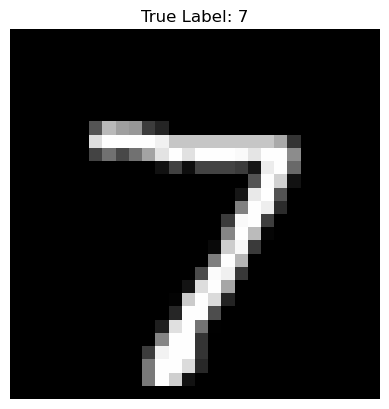

In [18]:
# Pick a sample from the test set
sample_image, sample_label = test_dataset[0]  # Get the first sample from the test set

# Display the image
plt.imshow(sample_image.squeeze(), cmap='gray')  # squeeze() removes extra dimensions (1, 28, 28 -> 28, 28)
plt.title(f"True Label: {sample_label}")
plt.axis('off')  # Optional: Remove axis for better display
plt.show()

In [19]:
# Classify the image using the trained model
sample_image = sample_image.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)
sample_image = sample_image.to(torch.device('cpu'))  # Ensure it's on the same device as the model

with torch.no_grad():
    output = model(sample_image)
    _, predicted_class = torch.max(output, 1)

print(f"Predicted Label: {predicted_class.item()}")

Predicted Label: 7
